# Plot scan

In [1]:
import warnings
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.append('../plotting')
from auxPlots import interpolateData
from nloSbottomXsec import xsecF
import seaborn as sns
from scipy.interpolate import interp1d
pd.option_context('display.max_columns', -1)
pd.set_option('display.max_rows', 500)

pd.options.mode.chained_assignment = None #Disable copy warnings
# plt.style.use('fivethirtyeight') #Set style
# mpl.rcParams.update({'figure.figsize' : (15,10)})  #Set general plotting options
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})

plt.rcParams.update({"savefig.dpi" : 300}) #Figure resolution


#Define plotting style:
sns.set_style('ticks',{'font.family':'Times New Roman', 'font.serif':'Times New Roman'})
sns.set_context('paper', font_scale=1.8)
cm = plt.colormaps['RdYlBu']

### Load Recast Data

In [2]:
recastDF = pd.read_pickle('../results_dataFrames/pp2BB1j_2018_42_New.pcl')

### Get all model points

In [3]:
mLLP = 'mLLP'
mn1= 'mLSP'
tau = 'tau_ns'
models = []
mCols = [mLLP,mn1,tau]

for row in recastDF[mCols].values:
    m = dict(zip(mCols,row.tolist()))
    if m not in models:
        models.append(m)
print('%i models loaded' %len(models))

213 models loaded


### Get K-factors

In [4]:
recastDF['kfactor'] = recastDF[mLLP].apply(xsecF)/recastDF['Total xsec (pb)']
print('%1.1f < k-factor < %1.1f' %(recastDF['kfactor'].min(),recastDF['kfactor'].max()))

1.4 < k-factor < 3.8


### Plot exclusion for each analysis

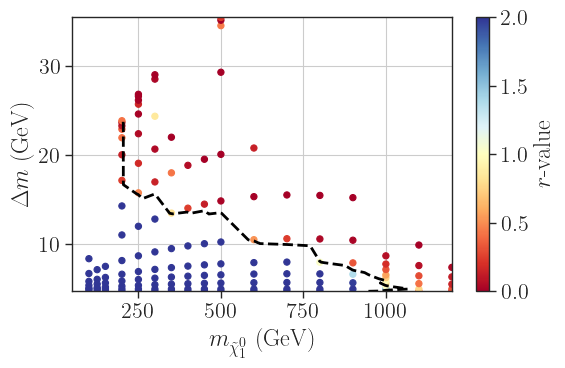

In [5]:
fig = plt.figure(figsize=(6,4))
x = recastDF['mLSP']
y = recastDF['mLLP']-x
rValues = recastDF['robs']*recastDF['kfactor']
p = plt.scatter(x=x,y=y,vmin=0.0,vmax=2.0,
        c=rValues,cmap=cm,s=20)
plt.colorbar(label=r'$r$-value')
# Interpolate to create more points
xnew,ynew,znew = interpolateData(x,y,rValues,nx=500,ny=500)
cValues = sorted([1.])
# Get contours
plt.contour(xnew, ynew, znew, cValues, 
                           colors='black',linestyles='dashed',
                           linewidths=2.0)

plt.ylabel(r'$\Delta m$ (GeV)')
plt.xlabel(r'$m_{\tilde \chi_1^0}$ (GeV)')
# plt.yscale('log')
plt.xlim(50.,1200.)
# plt.ylim(0.,15.)
# ax.set_ylim(5.0,1.1*y.max())
plt.grid()

# fig.subplots_adjust(right=0.9,top=1.1)
# cbar_ax = fig.add_axes([0.99, 0.25, 0.01, 0.5]) 
# plt.legend()
plt.tight_layout()
plt.show()

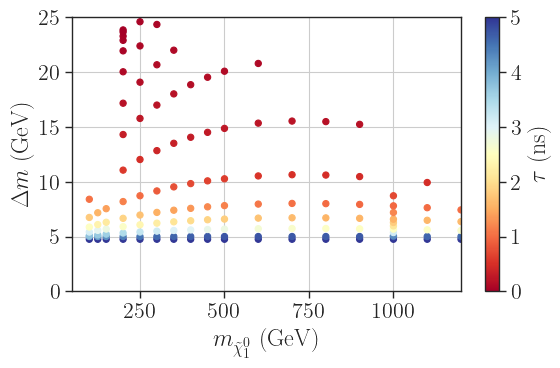

In [6]:
fig = plt.figure(figsize=(6,4))
x = recastDF['mLSP']
y = recastDF['mLLP']-x
rValues = recastDF['tau_ns']
p = plt.scatter(x=x,y=y,vmin=0.0,vmax=5.0,
        c=rValues,cmap=cm,s=20)
plt.colorbar(label=r'$\tau$ (ns)')
# Interpolate to create more points
# xnew,ynew,znew = interpolateData(x,y,rValues,nx=500,ny=500)
# cValues = sorted([1.])
# Get contours
# plt.contour(xnew, ynew, znew, cValues, 
                        #    colors='black',linestyles='dashed',
                        #    linewidths=2.0)

plt.ylabel(r'$\Delta m$ (GeV)')
plt.xlabel(r'$m_{\tilde \chi_1^0}$ (GeV)')
# plt.yscale('log')
# plt.xlim(0.2,50.)
plt.ylim(0.,25.)
plt.xlim(50.,1200.)
# ax.set_ylim(5.0,1.1*y.max())
plt.grid()

# fig.subplots_adjust(right=0.9,top=1.1)
# cbar_ax = fig.add_axes([0.99, 0.25, 0.01, 0.5]) 
# plt.legend()
plt.tight_layout()
plt.show()

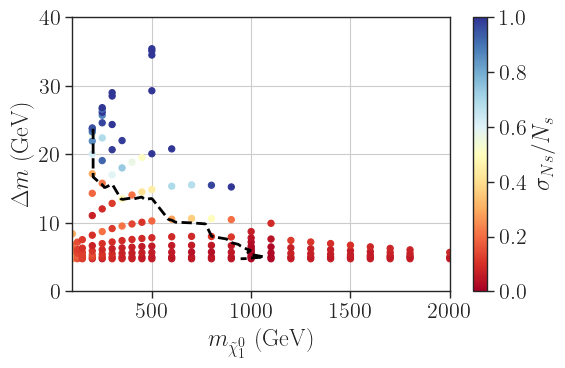

In [11]:
fig = plt.figure(figsize=(6,4))
x = recastDF['mLSP']
y = recastDF['mLLP']-x
rValues = recastDF['robs']*recastDF['kfactor']
z = recastDF['$\sigma_{Ns}$']/recastDF['$N_s$']
p = plt.scatter(x=x,y=y,vmin=0.0,vmax=1.0,
        c=z,cmap=cm,s=20)
plt.colorbar(label=r'$\sigma_{Ns}/N_s$')
# Interpolate to create more points
xnew,ynew,znew = interpolateData(x,y,rValues,nx=500,ny=500)
cValues = sorted([1.])
# Get contours
plt.contour(xnew, ynew, znew, cValues, 
                           colors='black',linestyles='dashed',
                           linewidths=2.0)

plt.ylabel(r'$\Delta m$ (GeV)')
plt.xlabel(r'$m_{\tilde \chi_1^0}$ (GeV)')
# plt.yscale('log')
plt.xlim(100.,2000.)
plt.ylim(0.,40.)
# ax.set_ylim(5.0,1.1*y.max())
plt.grid()

# fig.subplots_adjust(right=0.9,top=1.1)
# cbar_ax = fig.add_axes([0.99, 0.25, 0.01, 0.5]) 
# plt.legend()
plt.tight_layout()
plt.show()